In [5]:
!pip install fredapi


In [6]:
from fredapi import Fred
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('fivethirtyeight') #theme using for matplotlib
pd.set_option('display.max_columns', 500) # when the data is too wide
col_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
fred_key = '8a81d5aedcfebb8cf146b309dfa1dc02 '

1. Pulling the data by creating a fred object

In [7]:
fred = Fred(api_key = fred_key)

In [8]:
fred

2. Search for economic data

In [9]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [10]:
sp_search

id realtime_start realtime_end  \
series id                                                        
BAMLH0A0HYM2          BAMLH0A0HYM2     2024-09-04   2024-09-04   
CSUSHPINSA              CSUSHPINSA     2024-09-04   2024-09-04   
SP500                        SP500     2024-09-04   2024-09-04   
MEHOINUSA672N        MEHOINUSA672N     2024-09-04   2024-09-04   
BAMLH0A0HYM2EY      BAMLH0A0HYM2EY     2024-09-04   2024-09-04   
...                            ...            ...          ...   
DDDI12SMA156NWDB  DDDI12SMA156NWDB     2024-09-04   2024-09-04   
DDDI01GTA156NWDB  DDDI01GTA156NWDB     2024-09-04   2024-09-04   
Q03069USQ605NNBR  Q03069USQ605NNBR     2024-09-04   2024-09-04   
CSHXCPVEA156NRUG  CSHXCPVEA156NRUG     2024-09-04   2024-09-04   
CSHMCPNPA156NRUG  CSHMCPNPA156NRUG     2024-09-04   2024-09-04   

                                                              title  \
series id                                                             
BAMLH0A0HYM2      ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                       S&P 500   
MEHOINUSA672N     Real Median Household Income in the United States   
BAMLH0A0HYM2EY         ICE BofA US High Yield Index Effective Yield   
...                                                             ...   
DDDI12SMA156NWDB  Private Credit by Deposit Money Banks and Othe...   
DDDI01GTA156NWDB  Private Credit by Deposit Money Banks to GDP f...   
Q03069USQ605NNBR  Revenue Freight Tons Originated, Less Than Car...   
CSHXCPVEA156NRUG  Share of Merchandise Exports at Current Purcha...   
CSHMCPNPA156NRUG  Share of Merchandise Imports at Current Purcha...   

                 observation_start observation_end     frequency  \
series id                                                          
BAMLH0A0HYM2            1996-12-31      2024-09-03  Daily, Close   
CSUSHPINSA              1987-01-01      2024-06-01       Monthly   
SP500                   2014-09-04      2024-09-03  Daily, Close   
MEHOINUSA672N           1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY          1996-12-31      2024-09-03  Daily, Close   
...                            ...             ...           ...   
DDDI12SMA156NWDB        2001-01-01      2020-01-01        Annual   
DDDI01GTA156NWDB        1960-01-01      2021-01-01        Annual   
Q03069USQ605NNBR        1920-01-01      1943-07-01     Quarterly   
CSHXCPVEA156NRUG        1950-01-01      2019-01-01        Annual   
CSHMCPNPA156NRUG        1960-01-01      2019-01-01        Annual   

                 frequency_short                           units  \
series id                                                          
BAMLH0A0HYM2                   D                         Percent   
CSUSHPINSA                     M              Index Jan 2000=100   
SP500                          D                           Index   
MEHOINUSA672N                  A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY                 D                         Percent   
...                          ...                             ...   
DDDI12SMA156NWDB               A                         Percent   
DDDI01GTA156NWDB               A                         Percent   
Q03069USQ605NNBR               Q               Thousands of Tons   
CSHXCPVEA156NRUG               A                         Percent   
CSHMCPNPA156NRUG               A                         Percent   

                               units_short      seasonal_adjustment  \
series id                                                             
BAMLH0A0HYM2                             %  Not Seasonally Adjusted   
CSUSHPINSA              Index Jan 2000=100  Not Seasonally Adjusted   
SP500                                Index  Not Seasonally Adjusted   
MEHOINUSA672N     2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                           %  Not Seaso

In [11]:
sp_search.shape

(1000, 15)

3. Pulling Raw Data

In [12]:
sp500 = fred.get_series(series_id ='SP500')
sp500

2014-09-04    1997.65
2014-09-05    2007.71
2014-09-08    2001.54
2014-09-09    1988.44
2014-09-10    1995.69
               ...   
2024-08-28    5592.18
2024-08-29    5591.96
2024-08-30    5648.40
2024-09-02        NaN
2024-09-03    5528.93
Length: 2609, dtype: float64

<Axes: title={'center': 'S&P500'}>

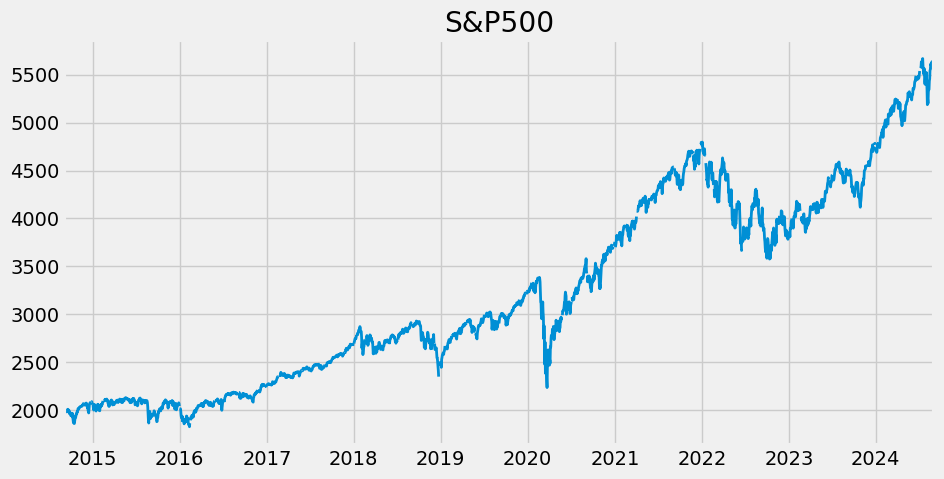

In [13]:
sp500.plot(figsize=(10,5),title = 'S&P500', lw=2)

4. Pulling and Joining Multiple Dataseries

In [14]:
unemp_results = fred.search('unemployment')

In [15]:
unemp_results

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2024-09-04   2024-09-04   
UNRATENSA                          UNRATENSA     2024-09-04   2024-09-04   
UNEMPLOY                            UNEMPLOY     2024-09-04   2024-09-04   
NROU                                    NROU     2024-09-04   2024-09-04   
CCSA                                    CCSA     2024-09-04   2024-09-04   
...                                      ...            ...          ...   
LAUCN340030000000003A  LAUCN340030000000003A     2024-09-04   2024-09-04   
LMUNRRTTLUM156S              LMUNRRTTLUM156S     2024-09-04   2024-09-04   
LNS14000315                      LNS14000315     2024-09-04   2024-09-04   
LNU04032222                      LNU04032222     2024-09-04   2024-09-04   
LNU04032223                      LNU04032223     2024-09-04   2024-09-04   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
UNEMPLOY                                              Unemployment Level   
NROU                                    Noncyclical Rate of Unemployment   
CCSA                             Continued Claims (Insured Unemployment)   
...                                                                  ...   
LAUCN340030000000003A             Unemployment Rate in Bergen County, NJ   
LMUNRRTTLUM156S        Infra-Annual Registered Unemployment and Job V...   
LNS14000315                            Unemployment Rate - Married Women   
LNU04032222            Unemployment Rate - Natural Resources, Constru...   
LNU04032223            Unemployment Rate - Farming, Fishing, and Fore...   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2024-07-01   
UNRATENSA                    1948-01-01      2024-07-01   
UNEMPLOY                     1948-01-01      2024-07-01   
NROU                         1949-01-01      2034-10-01   
CCSA                         1967-01-07      2024-08-17   
...                                 ...             ...   
LAUCN340030000000003A        1990-01-01      2023-01-01   
LMUNRRTTLUM156S              1995-01-01      2023-12-01   
LNS14000315                  1955-01-01      2024-07-01   
LNU04032222                  2000-01-01      2024-07-01   
LNU04032223                  2000-01-01      2024-07-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
UNEMPLOY                               Monthly               M   
NROU                                 Quarterly               Q   
CCSA                   Weekly, Ending Saturday               W   
...                                        ...             ...   
LAUCN340030000000003A                   Annual               A   
LMUNRRTTLUM156S                        Monthly               M   
LNS14000315                            Monthly               M   
LNU04032222                            Monthly               M   
LNU04032223                            Monthly               M   

                                             units  \
series id                                            
UNRATE                                     Percent   
UNRATENSA                                  Percent   
UNEMPLOY                      Thousands of Persons   
NROU                                       Percent   
CCSA                                        Number   
...                                            ...   
LAUCN

In [16]:
unrate = fred.get_series('UNRATE')

In [17]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-03-01    3.8
2024-04-01    3.9
2024-05-01    4.0
2024-06-01    4.1
2024-07-01    4.3
Length: 919, dtype: float64

In [18]:
# unrate.plot(figsize=(10, 6), title='Data Plot up to Latest Date')
unrate.index = pd.to_datetime(unrate.index)

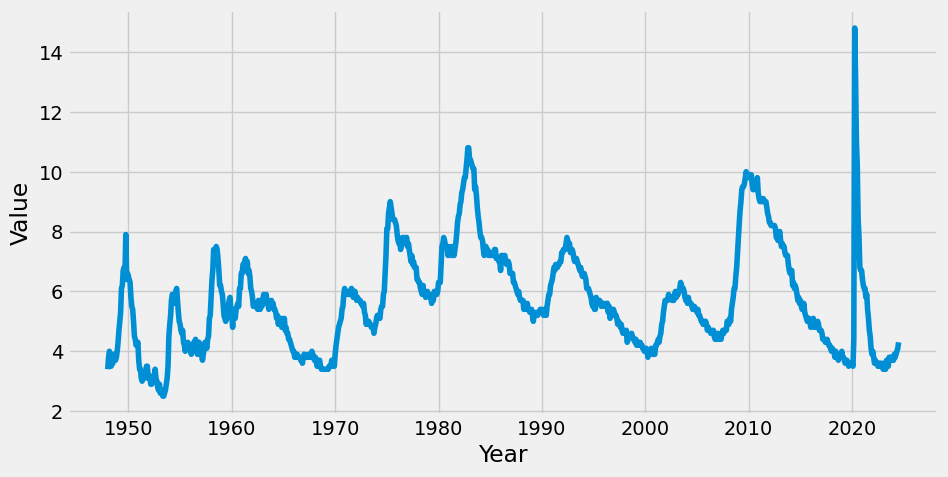

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(unrate.index, unrate.values)
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()


In [20]:

print(unrate.tail())


2024-03-01    3.8
2024-04-01    3.9
2024-05-01    4.0
2024-06-01    4.1
2024-07-01    4.3
dtype: float64


In [21]:
print(unrate.index.max())  # Should return the latest date in your data


2024-07-01 00:00:00


In [22]:
print(unrate.isna().sum())  # Check for missing values



0


In [23]:
print(unrate.loc['2020-01-01':'2024-12-31'])  # Show data from 2020 to 2024


2020-01-01     3.6
2020-02-01     3.5
2020-03-01     4.4
2020-04-01    14.8
2020-05-01    13.2
2020-06-01    11.0
2020-07-01    10.2
2020-08-01     8.4
2020-09-01     7.8
2020-10-01     6.8
2020-11-01     6.7
2020-12-01     6.7
2021-01-01     6.4
2021-02-01     6.2
2021-03-01     6.1
2021-04-01     6.1
2021-05-01     5.8
2021-06-01     5.9
2021-07-01     5.4
2021-08-01     5.1
2021-09-01     4.7
2021-10-01     4.5
2021-11-01     4.1
2021-12-01     3.9
2022-01-01     4.0
2022-02-01     3.8
2022-03-01     3.6
2022-04-01     3.7
2022-05-01     3.6
2022-06-01     3.6
2022-07-01     3.5
2022-08-01     3.6
2022-09-01     3.5
2022-10-01     3.6
2022-11-01     3.6
2022-12-01     3.5
2023-01-01     3.4
2023-02-01     3.6
2023-03-01     3.5
2023-04-01     3.4
2023-05-01     3.7
2023-06-01     3.6
2023-07-01     3.5
2023-08-01     3.8
2023-09-01     3.8
2023-10-01     3.8
2023-11-01     3.7
2023-12-01     3.7
2024-01-01     3.7
2024-02-01     3.9
2024-03-01     3.8
2024-04-01     3.9
2024-05-01  

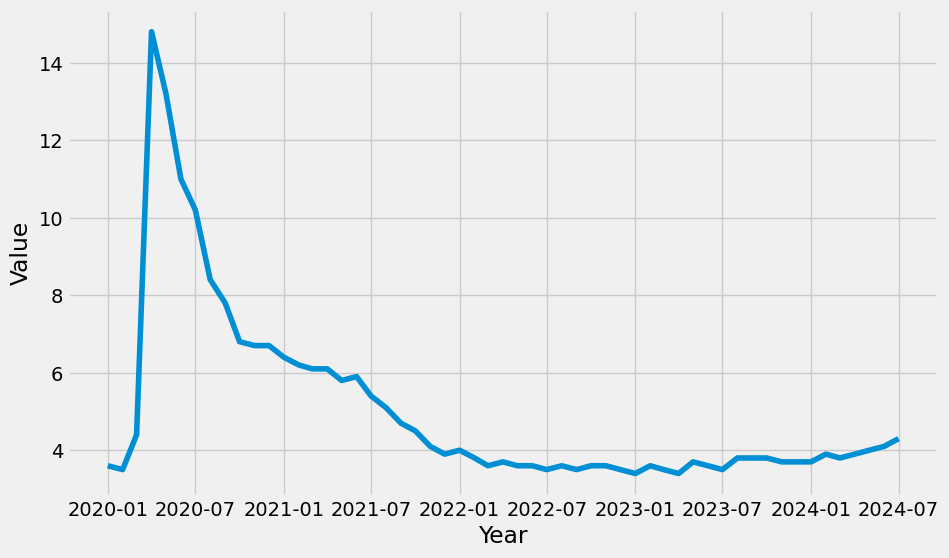

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(unrate['2020-01-01':'2024-12-31'].index, unrate['2020-01-01':'2024-12-31'].values)
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()


In [25]:
print(type(unrate.index))
print(unrate.index[-10:])  # Check the last 10 dates in the index


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01',
               '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
               '2024-06-01', '2024-07-01'],
              dtype='datetime64[ns]', freq=None)


In [26]:
print(unrate.info())  # Ensure all dates and values are correctly aligned


<class 'pandas.core.series.Series'>
DatetimeIndex: 919 entries, 1948-01-01 to 2024-07-01
Series name: None
Non-Null Count  Dtype  
--------------  -----  
919 non-null    float64
dtypes: float64(1)
memory usage: 46.6 KB
None


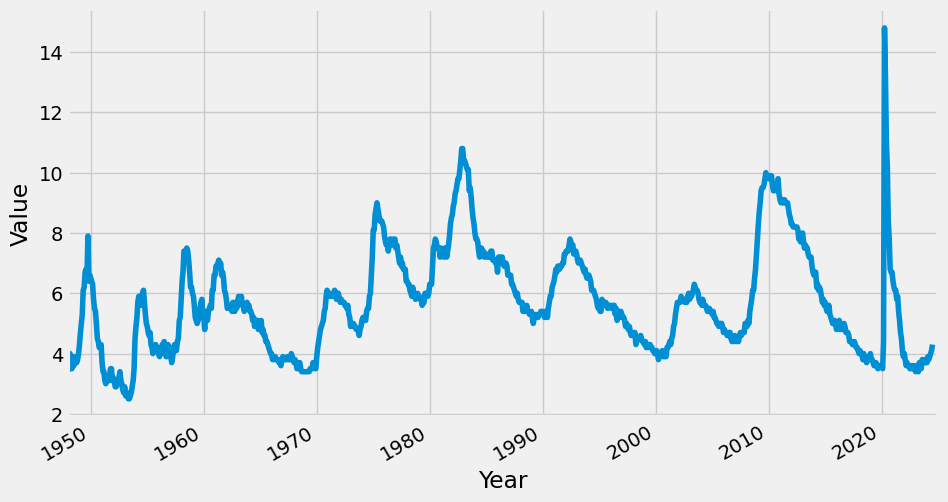

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(unrate.index, unrate.values)
plt.gcf().autofmt_xdate()  # Auto format the x-axis dates
plt.xlim(pd.to_datetime(['1948-01-01', '2024-12-31']))  # Ensure x-axis includes up to 2024
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()


In [28]:
unemp_df = fred.search('unemployment rate state',filter =( 'frequency','Monthly'))

In [29]:
unemp_df

id realtime_start realtime_end  \
series id                                              
UNRATE            UNRATE     2024-09-04   2024-09-04   
UNRATENSA      UNRATENSA     2024-09-04   2024-09-04   
LNS14000006  LNS14000006     2024-09-04   2024-09-04   
UNEMPLOY        UNEMPLOY     2024-09-04   2024-09-04   
LNU04000006  LNU04000006     2024-09-04   2024-09-04   
...                  ...            ...          ...   
LNU04032220  LNU04032220     2024-09-04   2024-09-04   
SCMARI7URN    SCMARI7URN     2024-09-04   2024-09-04   
VAALBE7URN    VAALBE7URN     2024-09-04   2024-09-04   
HAGE124UR      HAGE124UR     2024-09-04   2024-09-04   
MIINGH5URN    MIINGH5URN     2024-09-04   2024-09-04   

                                                         title  \
series id                                                        
UNRATE                                       Unemployment Rate   
UNRATENSA                                    Unemployment Rate   
LNS14000006      Unemployment Rate - Black or African American   
UNEMPLOY                                    Unemployment Level   
LNU04000006      Unemployment Rate - Black or African American   
...                                                        ...   
LNU04032220  Unemployment Rate - Sales and Related Occupations   
SCMARI7URN              Unemployment Rate in Marion County, SC   
VAALBE7URN           Unemployment Rate in Albemarle County, VA   
HAGE124UR    Unemployment Rate in Hagerstown-Martinsburg, M...   
MIINGH5URN              Unemployment Rate in Ingham County, MI   

            observation_start observation_end frequency frequency_short  \
series id                                                                 
UNRATE             1948-01-01      2024-07-01   Monthly               M   
UNRATENSA          1948-01-01      2024-07-01   Monthly               M   
LNS14000006        1972-01-01      2024-07-01   Monthly               M   
UNEMPLOY           1948-01-01      2024-07-01   Monthly               M   
LNU04000006        1972-01-01      2024-07-01   Monthly               M   
...                       ...             ...       ...             ...   
LNU04032220        2000-01-01      2024-07-01   Monthly               M   
SCMARI7URN         1990-01-01      2024-07-01   Monthly               M   
VAALBE7URN         1990-01-01      2024-07-01   Monthly               M   
HAGE124UR          1990-01-01      2024-07-01   Monthly               M   
MIINGH5URN         1990-01-01      2024-07-01   Monthly               M   

                            units        units_short  \
series id                                              
UNRATE                    Percent                  %   
UNRATENSA                 Percent                  %   
LNS14000006               Percent                  %   
UNEMPLOY     Thousands of Persons  Thous. of Persons   
LNU04000006               Percent                  %   
...                           ...                ...   
LNU04032220               Percent                  %   
SCMARI7URN                Percent                  %   
VAALBE7URN                Percent                  %   
HAGE124UR                 Percent                  %   
MIINGH5URN                Percent                  %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
UNRATE                Seasonally Adjusted                        SA   
UNRATENSA         Not Seasonally Adjusted                       NSA   
LNS14000006           Seasonally Adjusted                        SA   
UNEMPLOY              Seasonally Adjusted                        SA   
LNU04000006       Not Seasonally Adjusted                       NSA   
...                                   ...                       ...   
LNU04032220       Not Seasonally Adjusted                       NSA   
SCMARI7URN        Not Seasonally Adjusted                       NSA   
VAALBE7URN        N

In [30]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units =="Percent"')

In [31]:
unemp_df

id realtime_start realtime_end  \
series id                                                            
UNRATE                          UNRATE     2024-09-04   2024-09-04   
LNS14000006                LNS14000006     2024-09-04   2024-09-04   
U6RATE                          U6RATE     2024-09-04   2024-09-04   
CAUR                              CAUR     2024-09-04   2024-09-04   
TXUR                              TXUR     2024-09-04   2024-09-04   
...                                ...            ...          ...   
LNS14000150                LNS14000150     2024-09-04   2024-09-04   
NEIPTERM156SFRBRIC  NEIPTERM156SFRBRIC     2024-09-04   2024-09-04   
LBSSA10                        LBSSA10     2024-09-04   2024-09-04   
LBSSA44                        LBSSA44     2024-09-04   2024-09-04   
LRUN25TTUSM156S        LRUN25TTUSM156S     2024-09-04   2024-09-04   

                                                                title  \
series id                                                               
UNRATE                                              Unemployment Rate   
LNS14000006             Unemployment Rate - Black or African American   
U6RATE              Total Unemployed, Plus All Persons Marginally ...   
CAUR                                  Unemployment Rate in California   
TXUR                                       Unemployment Rate in Texas   
...                                                               ...   
LNS14000150                           Unemployment Rate - Married Men   
NEIPTERM156SFRBRIC  Hornstein-Kudlyak-Lange Non-Employment Index i...   
LBSSA10                   Labor Force Participation Rate for Delaware   
LBSSA44               Labor Force Participation Rate for Rhode Island   
LRUN25TTUSM156S     Infra-Annual Labor Statistics: Unemployment Ra...   

                   observation_start observation_end frequency  \
series id                                                        
UNRATE                    1948-01-01      2024-07-01   Monthly   
LNS14000006               1972-01-01      2024-07-01   Monthly   
U6RATE                    1994-01-01      2024-07-01   Monthly   
CAUR                      1976-01-01      2024-07-01   Monthly   
TXUR                      1976-01-01      2024-07-01   Monthly   
...                              ...             ...       ...   
LNS14000150               1955-01-01      2024-07-01   Monthly   
NEIPTERM156SFRBRIC        1994-01-01      2024-07-01   Monthly   
LBSSA10                   1976-01-01      2024-07-01   Monthly   
LBSSA44                   1976-01-01      2024-07-01   Monthly   
LRUN25TTUSM156S           1955-01-01      2024-07-01   Monthly   

                   frequency_short    units units_short  seasonal_adjustment  \
series id                                                                      
UNRATE                           M  Percent           %  Seasonally Adjusted   
LNS14000006                      M  Percent           %  Seasonally Adjusted   
U6RATE                           M  Percent           %  Seasonally Adjusted   
CAUR                             M  Percent           %  Seasonally Adjusted   
TXUR                             M  Percent           %  Seasonally Adjusted   
...                            ...      ...         ...                  ...   
LNS14000150                      M  Percent           %  Seasonally Adjusted   
NEIPTERM156SFRBRIC               M  Percent           %  Seasonally Adjusted   
LBSSA10                          M  Percent           %  Seasonally Adjusted   
LBSSA44                          M  Percent           %  Seasonally Adjusted   
LRUN25TTUSM156S                  M  Percent           %  Seasonally Adjusted   

                   seasonal_adjustment_short               last_updated  \
series id                                                                 
UNRATE                                    SA  2024-08-02 07:46:02-05:00   
LNS14000006                               SA  2024

In [32]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')].shape

(99, 15)

In [33]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [34]:
unemp_df

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2024-09-04   2024-09-04   
LNS14000006            LNS14000006     2024-09-04   2024-09-04   
CAUR                          CAUR     2024-09-04   2024-09-04   
TXUR                          TXUR     2024-09-04   2024-09-04   
M0892AUSM156SNBR  M0892AUSM156SNBR     2024-09-04   2024-09-04   
...                            ...            ...          ...   
LNS14000048            LNS14000048     2024-09-04   2024-09-04   
LNS14000089            LNS14000089     2024-09-04   2024-09-04   
M08311USM156SNBR  M08311USM156SNBR     2024-09-04   2024-09-04   
LNS14000150            LNS14000150     2024-09-04   2024-09-04   
LRUN25TTUSM156S    LRUN25TTUSM156S     2024-09-04   2024-09-04   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
LNS14000006           Unemployment Rate - Black or African American   
CAUR                                Unemployment Rate in California   
TXUR                                     Unemployment Rate in Texas   
M0892AUSM156SNBR                Unemployment Rate for United States   
...                                                             ...   
LNS14000048                      Unemployment Rate - 25 Yrs. & over   
LNS14000089                          Unemployment Rate - 25-34 Yrs.   
M08311USM156SNBR  Unemployment Rate, Married Males, Spouse Prese...   
LNS14000150                         Unemployment Rate - Married Men   
LRUN25TTUSM156S   Infra-Annual Labor Statistics: Unemployment Ra...   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2024-07-01   Monthly               M   
LNS14000006             1972-01-01      2024-07-01   Monthly               M   
CAUR                    1976-01-01      2024-07-01   Monthly               M   
TXUR                    1976-01-01      2024-07-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
...                            ...             ...       ...             ...   
LNS14000048             1948-01-01      2024-07-01   Monthly               M   
LNS14000089             1948-01-01      2024-07-01   Monthly               M   
M08311USM156SNBR        1954-11-01      1968-01-01   Monthly               M   
LNS14000150             1955-01-01      2024-07-01   Monthly               M   
LRUN25TTUSM156S         1955-01-01      2024-07-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
TXUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
...                   ...         ...                  ...   
LNS14000048       Percent           %  Seasonally Adjusted   
LNS14000089       Percent           %  Seasonally Adjusted   
M08311USM156SNBR  Percent           %  Seasonally Adjusted   
LNS14000150       Percent           %  Seasonally Adjusted   
LRUN25TTUSM156S   Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2024-08-02 07:46:02-05:00   
LNS14000006                             SA  2024-08-02 07:46:02-05:00   
CAUR                                    SA  2024-08-20 12:36:01-05:00   
TXUR                                

In [35]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR',
       'PRUR', 'INUR', 'LAUR', 'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR',
       'DCUR', 'MSUR', 'LNS14000060', 'LNS14000028', 'MEUR', 'NEUR',
       'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR', 'LNS14000018', 'RIUR',
       'KSUR', 'WYUR', 'DEUR', 'LNS14000036', 'VTUR', 'LNS14000032', 'SDUR',
       'CMWRUR', 'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689',
       'LNS14100000', 'LNS14000315', 

In [36]:
all_results = []
for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
unemp_results = pd.concat(all_results, axis=1)


In [37]:
unemp_results

UNRATE  LNS14000006  CAUR  TXUR  M0892AUSM156SNBR  LNS14000024  \
1929-04-01     NaN          NaN   NaN   NaN              0.69          NaN   
1929-05-01     NaN          NaN   NaN   NaN              1.65          NaN   
1929-06-01     NaN          NaN   NaN   NaN              2.06          NaN   
1929-07-01     NaN          NaN   NaN   NaN              0.79          NaN   
1929-08-01     NaN          NaN   NaN   NaN              0.04          NaN   
...            ...          ...   ...   ...               ...          ...   
2024-03-01     3.8          6.4   5.3   3.9               NaN          3.5   
2024-04-01     3.9          5.6   5.3   4.0               NaN          3.5   
2024-05-01     4.0          6.1   5.2   4.0               NaN          3.6   
2024-06-01     4.1          6.3   5.2   4.0               NaN          3.7   
2024-07-01     4.3          6.3   5.2   4.1               NaN          3.9   

            LNS14000031  M0892BUSM156SNBR  NYUR  U2RATE  FLUR  LNS14000002  \
1929-04-01          NaN               NaN   NaN     NaN   NaN          NaN   
1929-05-01          NaN               NaN   NaN     NaN   NaN          NaN   
1929-06-01          NaN               NaN   NaN     NaN   NaN          NaN   
1929-07-01          NaN               NaN   NaN     NaN   NaN          NaN   
1929-08-01          NaN               NaN   NaN     NaN   NaN          NaN   
...                 ...               ...   ...     ...   ...          ...   
2024-03-01          6.2               NaN   4.3     1.8   3.2          3.9   
2024-04-01          5.2               NaN   4.2     1.9   3.3          3.8   
2024-05-01          6.4               NaN   4.2     1.9   3.3          3.7   
2024-06-01          6.1               NaN   4.2     1.9   3.3          4.0   
2024-07-01          6.6               NaN   4.3     2.1   3.3          4.1   

            LNS14000009  LNS14000003  PAUR  OHUR  LNS14000001  LNS14027660  \
1929-04-01          NaN          NaN   NaN   NaN          NaN          NaN   
1929-05-01          NaN          NaN   NaN   NaN          NaN          NaN   
1929-06-01          NaN          NaN   NaN   NaN          NaN          NaN   
1929-07-01          NaN          NaN   NaN   NaN          NaN          NaN   
1929-08-01          NaN          NaN   NaN   NaN          NaN          NaN   
...                 ...          ...   ...   ...          ...          ...   
2024-03-01          4.5          3.4   3.4   3.8          3.7          4.1   
2024-04-01          4.8          3.5   3.4   4.0          3.9          4.0   
2024-05-01          5.0          3.5   3.4   4.2          4.2          4.3   
2024-06-01          4.9          3.5   3.4   4.4          4.1          4.2   
2024-07-01          5.3          3.8   3.4   4.5          4.4          4.6   

            MIUR  LNS14027662  ALUR  LNS14024887  MAUR  NCUR  ILUR  NJUR  \
1929-04-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   
...          ...          ...   ...          ...   ...   ...   ...   ...   
2024-03-01   3.9          2.1   3.0          8.8   2.9   3.5   4.8   4.8   
2024-04-01   3.9          2.2   3.1          8.2   2.9   3.5   4.8   4.7   
2024-05-01   3.9          2.1   3.0          9.2   3.0   3.6   4.9   4.6   
2024-06-01   4.1          2.4   2.9          8.9   3.2   3.6   5.0   4.6   
2024-07-01   4.4          2.3   2.8          9.1   3.5   3.7   5.2   4.7   

            GAUR  COUR  AZUR  WIUR  VAUR  KYUR  LRUN64TTUSM156S  SCUR  NMUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN              NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN              NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN     

In [38]:
unemp_states = unemp_results.drop('UNRATE',axis = 1)
unemp_states_clean = unemp_states.dropna()


In [39]:
print(unemp_states.isna().sum())
unemp_states_clean = unemp_states.dropna(subset=['CAUR', 'TXUR', 'NYUR'])  # Add columns that are crucial for your analysis


LNS14000006         501
CAUR                549
TXUR                549
M0892AUSM156SNBR    973
LNS14000024         213
                   ... 
LNS14000048         213
LNS14000089         213
M08311USM156SNBR    973
LNS14000150         297
LRUN25TTUSM156S     297
Length: 98, dtype: int64


In [40]:
unemp_states_clean

LNS14000006  CAUR  TXUR  M0892AUSM156SNBR  LNS14000024  \
1976-01-01         14.3   9.2   5.8               NaN          6.7   
1976-02-01         14.4   9.2   5.8               NaN          6.5   
1976-03-01         13.5   9.1   5.9               NaN          6.4   
1976-04-01         13.8   9.1   5.9               NaN          6.4   
1976-05-01         13.2   9.0   5.9               NaN          6.2   
...                 ...   ...   ...               ...          ...   
2024-03-01          6.4   5.3   3.9               NaN          3.5   
2024-04-01          5.6   5.3   4.0               NaN          3.5   
2024-05-01          6.1   5.2   4.0               NaN          3.6   
2024-06-01          6.3   5.2   4.0               NaN          3.7   
2024-07-01          6.3   5.2   4.1               NaN          3.9   

            LNS14000031  M0892BUSM156SNBR  NYUR  U2RATE  FLUR  LNS14000002  \
1976-01-01         12.0               NaN  10.3     3.9   9.7          8.9   
1976-02-01         11.9               NaN  10.3     3.8   9.7          8.8   
1976-03-01         11.2               NaN  10.2     3.8   9.6          8.6   
1976-04-01         10.9               NaN  10.2     3.8   9.5          8.6   
1976-05-01         10.4               NaN  10.1     3.7   9.3          8.1   
...                 ...               ...   ...     ...   ...          ...   
2024-03-01          6.2               NaN   4.3     1.8   3.2          3.9   
2024-04-01          5.2               NaN   4.2     1.9   3.3          3.8   
2024-05-01          6.4               NaN   4.2     1.9   3.3          3.7   
2024-06-01          6.1               NaN   4.2     1.9   3.3          4.0   
2024-07-01          6.6               NaN   4.3     2.1   3.3          4.1   

            LNS14000009  LNS14000003  PAUR  OHUR  LNS14000001  LNS14027660  \
1976-01-01         11.4          7.2   8.0   8.1          7.3          NaN   
1976-02-01         10.7          6.9   8.1   8.1          7.0          NaN   
1976-03-01         11.0          6.9   8.1   8.1          6.9          NaN   
1976-04-01         11.7          6.9   8.1   8.0          7.0          NaN   
1976-05-01         10.5          6.7   8.1   7.8          6.9          NaN   
...                 ...          ...   ...   ...          ...          ...   
2024-03-01          4.5          3.4   3.4   3.8          3.7          4.1   
2024-04-01          4.8          3.5   3.4   4.0          3.9          4.0   
2024-05-01          5.0          3.5   3.4   4.2          4.2          4.3   
2024-06-01          4.9          3.5   3.4   4.4          4.1          4.2   
2024-07-01          5.3          3.8   3.4   4.5          4.4          4.6   

            MIUR  LNS14027662  ALUR  LNS14024887  MAUR  NCUR  ILUR  NJUR  \
1976-01-01   9.9          NaN   6.6         15.4  10.5   6.4   6.6  10.3   
1976-02-01   9.9          NaN   6.6         14.7  10.5   6.4   6.6  10.3   
1976-03-01   9.9          NaN   6.6         14.6  10.5   6.4   6.6  10.3   
1976-04-01   9.8          NaN   6.5         14.9  10.3   6.3   6.6  10.3   
1976-05-01   9.6          NaN   6.4         14.3  10.1   6.1   6.6  10.3   
...          ...          ...   ...          ...   ...   ...   ...   ...   
2024-03-01   3.9          2.1   3.0          8.8   2.9   3.5   4.8   4.8   
2024-04-01   3.9          2.2   3.1          8.2   2.9   3.5   4.8   4.7   
2024-05-01   3.9          2.1   3.0          9.2   3.0   3.6   4.9   4.6   
2024-06-01   4.1          2.4   2.9          8.9   3.2   3.6   5.0   4.6   
2024-07-01   4.4          2.3   2.8          9.1   3.5   3.7   5.2   4.7   

            GAUR  COUR  AZUR  WIUR  VAUR  KYUR  LRUN64TTUSM156S  SCUR  NMUR  \
1976-01-01   8.4   5.8  10.2   5.8   6.1   5.6         7.997195   7.4   8.6   
1976-02-01   8.4   5.7  10.2   5.8   6.1   5.6         7.846081   7.4   8.7   
1976-03-01   8.4   5.7  10.1   5.7   6.1   5.6         7.708743   7.3   8.7   
1976-04-01   8.3   5.6  10.0   5.6   6.0   5.6         7.763319   7.

In [41]:
!pip install --upgrade plotly


In [42]:
px.line(unemp_states_clean)

In [43]:
import plotly.express as px
fig = px.line(unemp_states_clean, y=unemp_states_clean.columns[1:], title="Unemployment by State")

# Update the layout to ensure interactive legend behavior
fig.update_layout(legend=dict(
    itemclick="toggle",  # Single-click toggles visibility
    itemdoubleclick="toggleothers"  # Double-click isolates the clicked trace
))

# Display the plot
fig.show()

In [44]:
unemp_states_clean = unemp_states_clean.fillna(unemp_states_clean.mean().round(1))
unemp_states_clean

LNS14000006  CAUR  TXUR  M0892AUSM156SNBR  LNS14000024  \
1976-01-01         14.3   9.2   5.8               NaN          6.7   
1976-02-01         14.4   9.2   5.8               NaN          6.5   
1976-03-01         13.5   9.1   5.9               NaN          6.4   
1976-04-01         13.8   9.1   5.9               NaN          6.4   
1976-05-01         13.2   9.0   5.9               NaN          6.2   
...                 ...   ...   ...               ...          ...   
2024-03-01          6.4   5.3   3.9               NaN          3.5   
2024-04-01          5.6   5.3   4.0               NaN          3.5   
2024-05-01          6.1   5.2   4.0               NaN          3.6   
2024-06-01          6.3   5.2   4.0               NaN          3.7   
2024-07-01          6.3   5.2   4.1               NaN          3.9   

            LNS14000031  M0892BUSM156SNBR  NYUR  U2RATE  FLUR  LNS14000002  \
1976-01-01         12.0               NaN  10.3     3.9   9.7          8.9   
1976-02-01         11.9               NaN  10.3     3.8   9.7          8.8   
1976-03-01         11.2               NaN  10.2     3.8   9.6          8.6   
1976-04-01         10.9               NaN  10.2     3.8   9.5          8.6   
1976-05-01         10.4               NaN  10.1     3.7   9.3          8.1   
...                 ...               ...   ...     ...   ...          ...   
2024-03-01          6.2               NaN   4.3     1.8   3.2          3.9   
2024-04-01          5.2               NaN   4.2     1.9   3.3          3.8   
2024-05-01          6.4               NaN   4.2     1.9   3.3          3.7   
2024-06-01          6.1               NaN   4.2     1.9   3.3          4.0   
2024-07-01          6.6               NaN   4.3     2.1   3.3          4.1   

            LNS14000009  LNS14000003  PAUR  OHUR  LNS14000001  LNS14027660  \
1976-01-01         11.4          7.2   8.0   8.1          7.3          5.6   
1976-02-01         10.7          6.9   8.1   8.1          7.0          5.6   
1976-03-01         11.0          6.9   8.1   8.1          6.9          5.6   
1976-04-01         11.7          6.9   8.1   8.0          7.0          5.6   
1976-05-01         10.5          6.7   8.1   7.8          6.9          5.6   
...                 ...          ...   ...   ...          ...          ...   
2024-03-01          4.5          3.4   3.4   3.8          3.7          4.1   
2024-04-01          4.8          3.5   3.4   4.0          3.9          4.0   
2024-05-01          5.0          3.5   3.4   4.2          4.2          4.3   
2024-06-01          4.9          3.5   3.4   4.4          4.1          4.2   
2024-07-01          5.3          3.8   3.4   4.5          4.4          4.6   

            MIUR  LNS14027662  ALUR  LNS14024887  MAUR  NCUR  ILUR  NJUR  \
1976-01-01   9.9          2.8   6.6         15.4  10.5   6.4   6.6  10.3   
1976-02-01   9.9          2.8   6.6         14.7  10.5   6.4   6.6  10.3   
1976-03-01   9.9          2.8   6.6         14.6  10.5   6.4   6.6  10.3   
1976-04-01   9.8          2.8   6.5         14.9  10.3   6.3   6.6  10.3   
1976-05-01   9.6          2.8   6.4         14.3  10.1   6.1   6.6  10.3   
...          ...          ...   ...          ...   ...   ...   ...   ...   
2024-03-01   3.9          2.1   3.0          8.8   2.9   3.5   4.8   4.8   
2024-04-01   3.9          2.2   3.1          8.2   2.9   3.5   4.8   4.7   
2024-05-01   3.9          2.1   3.0          9.2   3.0   3.6   4.9   4.6   
2024-06-01   4.1          2.4   2.9          8.9   3.2   3.6   5.0   4.6   
2024-07-01   4.4          2.3   2.8          9.1   3.5   3.7   5.2   4.7   

            GAUR  COUR  AZUR  WIUR  VAUR  KYUR  LRUN64TTUSM156S  SCUR  NMUR  \
1976-01-01   8.4   5.8  10.2   5.8   6.1   5.6         7.997195   7.4   8.6   
1976-02-01   8.4   5.7  10.2   5.8   6.1   5.6         7.846081   7.4   8.7   
1976-03-01   8.4   5.7  10.1   5.7   6.1   5.6         7.708743   7.3   8.7   
1976-04-01   8.3   5.6  10.0   5.6   6.0   5.6         7.763319   7.

In [45]:
if 'M0892AUSM156SNBR' in unemp_states_clean.columns:
    unemp_states_clean = unemp_states_clean.drop('M0892AUSM156SNBR', axis=1)


In [46]:
unemp_states_clean.columns

Index(['LNS14000006', 'CAUR', 'TXUR', 'LNS14000024', 'LNS14000031',
       'M0892BUSM156SNBR', 'NYUR', 'U2RATE', 'FLUR', 'LNS14000002',
       'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR', 'LNS14000001',
       'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR', 'LNS14024887', 'MAUR',
       'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
       'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR', 'TNUR', 'LNS14032183',
       'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
       'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR', 'INUR', 'LAUR',
       'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR', 'DCUR', 'MSUR',
       'LNS14000060', 'LNS14000028', 'MEUR', 'NEUR', 'LASMT391746000000003',
       'CTUR', 'IDUR', 'NHUR', 'LNS14000018', 'RIUR', 'KSUR', 'WYUR', 'DEUR',
       'LNS14000036', 'VTUR', 'LNS14000032', 'SDUR', 'CMWRUR', 'LNS14200000',
       'LRUN24TTUSM156S', 'LNS14027689', 'LNS14100000', 'LNS14000315',
       'LNS14000029', 'LRHUTTTTUSM156

In [47]:
# Drop columns where series IDs start with 'LR', 'LASMT', 'LNS', or 'M0892'
unemp_states_clean = unemp_states_clean.drop(
    unemp_states_clean.filter(regex='^LR|^LASMT|^LNS|^M0892').columns, axis=1
)

# Display the remaining columns to verify the result
print(unemp_states_clean.columns)

# Display the first few rows of the cleaned DataFrame to verify
print(unemp_states_clean.head())


Index(['CAUR', 'TXUR', 'NYUR', 'U2RATE', 'FLUR', 'PAUR', 'OHUR', 'MIUR',
       'ALUR', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR',
       'VAUR', 'KYUR', 'SCUR', 'NMUR', 'MNUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR',
       'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR',
       'INUR', 'LAUR', 'HIUR', 'NDUR', 'MTUR', 'DCUR', 'MSUR', 'MEUR', 'NEUR',
       'CTUR', 'IDUR', 'NHUR', 'RIUR', 'KSUR', 'WYUR', 'DEUR', 'VTUR', 'SDUR',
       'CMWRUR', 'CSOUUR', 'CNERUR', 'CWSTUR', 'CNEWUR', 'M08311USM156SNBR'],
      dtype='object')
            CAUR  TXUR  NYUR  U2RATE  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  \
1976-01-01   9.2   5.8  10.3     3.9   9.7   8.0   8.1   9.9   6.6  10.5   
1976-02-01   9.2   5.8  10.3     3.8   9.7   8.1   8.1   9.9   6.6  10.5   
1976-03-01   9.1   5.9  10.2     3.8   9.6   8.1   8.1   9.9   6.6  10.5   
1976-04-01   9.1   5.9  10.2     3.8   9.5   8.1   8.0   9.8   6.5  10.3   
1976-05-01   9.0   5.9  10.1     3.7   9.3   8.1   7

In [48]:
unemp_states_clean

CAUR  TXUR  NYUR  U2RATE  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  \
1976-01-01   9.2   5.8  10.3     3.9   9.7   8.0   8.1   9.9   6.6  10.5   
1976-02-01   9.2   5.8  10.3     3.8   9.7   8.1   8.1   9.9   6.6  10.5   
1976-03-01   9.1   5.9  10.2     3.8   9.6   8.1   8.1   9.9   6.6  10.5   
1976-04-01   9.1   5.9  10.2     3.8   9.5   8.1   8.0   9.8   6.5  10.3   
1976-05-01   9.0   5.9  10.1     3.7   9.3   8.1   7.8   9.6   6.4  10.1   
...          ...   ...   ...     ...   ...   ...   ...   ...   ...   ...   
2024-03-01   5.3   3.9   4.3     1.8   3.2   3.4   3.8   3.9   3.0   2.9   
2024-04-01   5.3   4.0   4.2     1.9   3.3   3.4   4.0   3.9   3.1   2.9   
2024-05-01   5.2   4.0   4.2     1.9   3.3   3.4   4.2   3.9   3.0   3.0   
2024-06-01   5.2   4.0   4.2     1.9   3.3   3.4   4.4   4.1   2.9   3.2   
2024-07-01   5.2   4.1   4.3     2.1   3.3   3.4   4.5   4.4   2.8   3.5   

            NCUR  ILUR  NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  \
1976-01-01   6.4   6.6  10.3   8.4   5.8  10.2   5.8   6.1   5.6   7.4   8.6   
1976-02-01   6.4   6.6  10.3   8.4   5.7  10.2   5.8   6.1   5.6   7.4   8.7   
1976-03-01   6.4   6.6  10.3   8.4   5.7  10.1   5.7   6.1   5.6   7.3   8.7   
1976-04-01   6.3   6.6  10.3   8.3   5.6  10.0   5.6   6.0   5.6   7.2   8.6   
1976-05-01   6.1   6.6  10.3   8.1   5.6   9.8   5.5   5.9   5.5   7.0   8.6   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-03-01   3.5   4.8   4.8   3.1   3.7   3.8   3.0   2.9   4.5   3.1   3.8   
2024-04-01   3.5   4.8   4.7   3.1   3.7   3.6   2.9   2.8   4.6   3.2   3.8   
2024-05-01   3.6   4.9   4.6   3.2   3.8   3.4   2.9   2.7   4.6   3.4   3.8   
2024-06-01   3.6   5.0   4.6   3.3   3.8   3.3   2.9   2.7   4.6   3.6   3.9   
2024-07-01   3.7   5.2   4.7   3.4   3.9   3.4   3.0   2.7   4.7   3.9   4.0   

            MNUR  TNUR  WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  \
1976-01-01   6.0   6.0   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   
1976-02-01   6.0   6.0   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   
1976-03-01   5.9   6.0   8.4   6.4   9.4   7.5   9.2   7.3   5.8   5.9   7.0   
1976-04-01   5.8   6.0   8.5   6.4   9.2   7.5   9.0   7.2   5.8   6.0   6.9   
1976-05-01   5.7   5.9   8.5   6.5   9.1   7.4   8.9   7.1   5.7   6.0   6.9   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-03-01   2.7   3.2   4.8   2.5   4.2   4.3   5.1   3.5   3.5   3.3   4.6   
2024-04-01   2.7   3.1   4.8   2.6   4.2   4.3   5.1   3.4   3.5   3.4   4.6   
2024-05-01   2.8   3.0   4.9   2.7   4.2   4.2   5.1   3.4   3.5   3.5   4.5   
2024-06-01   2.9   3.0   4.8   2.8   4.1   4.1   5.2   3.3   3.4   3.7   4.5   
2024-07-01   3.2   3.0   4.9   2.8   4.1   4.2   5.4   3.3   3.5   3.8   4.5   

            IAUR  UTUR  PRUR  INUR  LAUR  HIUR  NDUR  MTUR  DCUR  MSUR  MEUR  \
1976-01-01   4.3   5.8  19.6   6.6   6.3   9.8   3.4   5.8   8.7   6.7   8.7   
1976-02-01   4.3   5.9  19.5   6.6   6.3   9.8   3.4   5.8   8.7   6.7   8.7   
1976-03-01   4.3   5.8  19.3   6.5   6.3   9.8   3.4   5.8   8.6   6.6   8.6   
1976-04-01   4.2   5.8  19.0   6.3   6.4   9.7   3.5   5.8   8.5   6.4   8.6   
1976-05-01   4.1   5.7  18.9   6.0   6.5   9.4   3.6   5.8   8.4   6.3   8.5   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-03-01   2.9   2.8   5.8   3.5   4.4   3.1   2.0   3.3   5.2   3.0   3.3   
2024-04-01   2.8   2.8   5.8   3.6   4.3   3.1   2.0   3.1   5.2   2.8   3.1   
2024-05-01   2.8   2.9   5.8   3.7   4.1   3.0   2.0   3.1   5.3   2.8   3.0   
2024-06-01   2.8   3.0   5.8   3.8   4.0   2.9   2.1   3.1   5.4   2.8   2.8   
2024-07-01   2.8   3.2   5.8   4.0   3.9   2.9   2.2   3.1   5.5   2.7   2.8   

            NEUR  CTUR  IDUR  NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  \
1976-01-01   3.3   9.8   5.6   6.5   7.8   4.2   4.1   8.0   8.6   3.3   
1976-02-01   3.3   9.8   5.6   6.5   7.8   4.2   4.1   8.0   8.6   3

In [49]:
if 'M08311USM156SNBR' in unemp_states_clean.columns:
    unemp_states_clean = unemp_states_clean.drop('M08311USM156SNBR', axis=1)

In [50]:
unemp_states_clean

CAUR  TXUR  NYUR  U2RATE  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  \
1976-01-01   9.2   5.8  10.3     3.9   9.7   8.0   8.1   9.9   6.6  10.5   
1976-02-01   9.2   5.8  10.3     3.8   9.7   8.1   8.1   9.9   6.6  10.5   
1976-03-01   9.1   5.9  10.2     3.8   9.6   8.1   8.1   9.9   6.6  10.5   
1976-04-01   9.1   5.9  10.2     3.8   9.5   8.1   8.0   9.8   6.5  10.3   
1976-05-01   9.0   5.9  10.1     3.7   9.3   8.1   7.8   9.6   6.4  10.1   
...          ...   ...   ...     ...   ...   ...   ...   ...   ...   ...   
2024-03-01   5.3   3.9   4.3     1.8   3.2   3.4   3.8   3.9   3.0   2.9   
2024-04-01   5.3   4.0   4.2     1.9   3.3   3.4   4.0   3.9   3.1   2.9   
2024-05-01   5.2   4.0   4.2     1.9   3.3   3.4   4.2   3.9   3.0   3.0   
2024-06-01   5.2   4.0   4.2     1.9   3.3   3.4   4.4   4.1   2.9   3.2   
2024-07-01   5.2   4.1   4.3     2.1   3.3   3.4   4.5   4.4   2.8   3.5   

            NCUR  ILUR  NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  \
1976-01-01   6.4   6.6  10.3   8.4   5.8  10.2   5.8   6.1   5.6   7.4   8.6   
1976-02-01   6.4   6.6  10.3   8.4   5.7  10.2   5.8   6.1   5.6   7.4   8.7   
1976-03-01   6.4   6.6  10.3   8.4   5.7  10.1   5.7   6.1   5.6   7.3   8.7   
1976-04-01   6.3   6.6  10.3   8.3   5.6  10.0   5.6   6.0   5.6   7.2   8.6   
1976-05-01   6.1   6.6  10.3   8.1   5.6   9.8   5.5   5.9   5.5   7.0   8.6   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-03-01   3.5   4.8   4.8   3.1   3.7   3.8   3.0   2.9   4.5   3.1   3.8   
2024-04-01   3.5   4.8   4.7   3.1   3.7   3.6   2.9   2.8   4.6   3.2   3.8   
2024-05-01   3.6   4.9   4.6   3.2   3.8   3.4   2.9   2.7   4.6   3.4   3.8   
2024-06-01   3.6   5.0   4.6   3.3   3.8   3.3   2.9   2.7   4.6   3.6   3.9   
2024-07-01   3.7   5.2   4.7   3.4   3.9   3.4   3.0   2.7   4.7   3.9   4.0   

            MNUR  TNUR  WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  \
1976-01-01   6.0   6.0   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   
1976-02-01   6.0   6.0   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   
1976-03-01   5.9   6.0   8.4   6.4   9.4   7.5   9.2   7.3   5.8   5.9   7.0   
1976-04-01   5.8   6.0   8.5   6.4   9.2   7.5   9.0   7.2   5.8   6.0   6.9   
1976-05-01   5.7   5.9   8.5   6.5   9.1   7.4   8.9   7.1   5.7   6.0   6.9   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-03-01   2.7   3.2   4.8   2.5   4.2   4.3   5.1   3.5   3.5   3.3   4.6   
2024-04-01   2.7   3.1   4.8   2.6   4.2   4.3   5.1   3.4   3.5   3.4   4.6   
2024-05-01   2.8   3.0   4.9   2.7   4.2   4.2   5.1   3.4   3.5   3.5   4.5   
2024-06-01   2.9   3.0   4.8   2.8   4.1   4.1   5.2   3.3   3.4   3.7   4.5   
2024-07-01   3.2   3.0   4.9   2.8   4.1   4.2   5.4   3.3   3.5   3.8   4.5   

            IAUR  UTUR  PRUR  INUR  LAUR  HIUR  NDUR  MTUR  DCUR  MSUR  MEUR  \
1976-01-01   4.3   5.8  19.6   6.6   6.3   9.8   3.4   5.8   8.7   6.7   8.7   
1976-02-01   4.3   5.9  19.5   6.6   6.3   9.8   3.4   5.8   8.7   6.7   8.7   
1976-03-01   4.3   5.8  19.3   6.5   6.3   9.8   3.4   5.8   8.6   6.6   8.6   
1976-04-01   4.2   5.8  19.0   6.3   6.4   9.7   3.5   5.8   8.5   6.4   8.6   
1976-05-01   4.1   5.7  18.9   6.0   6.5   9.4   3.6   5.8   8.4   6.3   8.5   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-03-01   2.9   2.8   5.8   3.5   4.4   3.1   2.0   3.3   5.2   3.0   3.3   
2024-04-01   2.8   2.8   5.8   3.6   4.3   3.1   2.0   3.1   5.2   2.8   3.1   
2024-05-01   2.8   2.9   5.8   3.7   4.1   3.0   2.0   3.1   5.3   2.8   3.0   
2024-06-01   2.8   3.0   5.8   3.8   4.0   2.9   2.1   3.1   5.4   2.8   2.8   
2024-07-01   2.8   3.2   5.8   4.0   3.9   2.9   2.2   3.1   5.5   2.7   2.8   

            NEUR  CTUR  IDUR  NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  \
1976-01-01   3.3   9.8   5.6   6.5   7.8   4.2   4.1   8.0   8.6   3.3   
1976-02-01   3.3   9.8   5.6   6.5   7.8   4.2   4.1   8.0   8.6   3

In [51]:
px.line(unemp_states_clean)

Pulling Specific Month Unemployment Rates (MAY -2024)

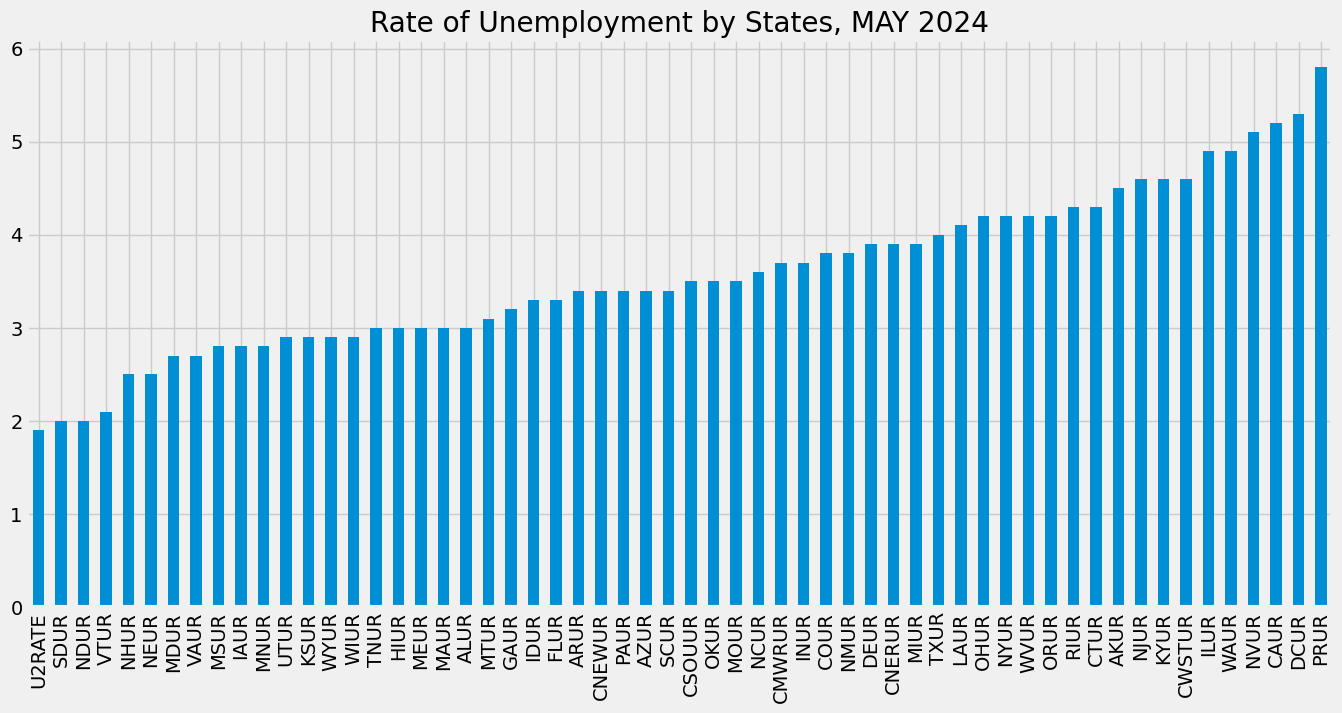

In [52]:
ax = unemp_states_clean.loc[unemp_states_clean.index == '2024-05-01'].T \
    .sort_values(by='2024-05-01') \
    .plot(kind='bar', figsize=(15, 7),
          title = 'Rate of Unemployment by States, MAY 2024')
ax.legend().remove()
plt.show()


In [53]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in','').to_dict()
id_to_state

{'UNRATE': 'Unemployment Rate',
 'LNS14000006': 'Unemployment Rate - Black or African American',
 'CAUR': ' California',
 'TXUR': ' Texas',
 'M0892AUSM156SNBR': 'Unemployment Rate for United States',
 'LNS14000024': 'Unemployment Rate - 20 Yrs. & over',
 'LNS14000031': 'Unemployment Rate - 20 Yrs. & over, Black or African American Men',
 'M0892BUSM156SNBR': 'Unemployment Rate for United States',
 'NYUR': ' New York',
 'U2RATE': 'Unemployment Rate - Job Losers (U-2)',
 'FLUR': ' Florida',
 'LNS14000002': 'Unemployment Rate - Women',
 'LNS14000009': 'Unemployment Rate - Hispanic or Latino',
 'LNS14000003': 'Unemployment Rate - White',
 'PAUR': ' Pennsylvania',
 'OHUR': ' Ohio',
 'LNS14000001': 'Unemployment Rate - Men',
 'LNS14027660': 'Unemployment Rate - High School Graduates, No College, 25 Yrs. & over',
 'MIUR': ' Michigan',
 'LNS14027662': "Unemployment Rate - Bachelor's Degree and Higher, 25 Yrs. & over",
 'ALUR': ' Alabama',
 'LNS14024887': 'Unemployment Rate - 16-24 Yrs.',
 'MAUR

In [54]:
# mapping
unemp_states_clean.columns = [id_to_state[c] for c in unemp_states_clean.columns]

In [55]:
unemp_states_clean.columns

Index([' California', ' Texas', ' New York',
       'Unemployment Rate - Job Losers (U-2)', ' Florida', ' Pennsylvania',
       ' Ohio', ' Michigan', ' Alabama', ' Massachusetts', ' North Carolina',
       ' Illinois', ' New Jersey', ' Georgia', ' Colorado', ' Arizona',
       ' Wisconsin', ' Virginia', ' Kentucky', ' South Carolina',
       ' New Mexico', ' Minnesota', ' Tennessee', ' Washington', ' Maryland',
       ' Oregon', ' West Virginia', ' Nevada', ' Arkansas', ' Oklahoma',
       ' Missouri', ' Alaska', ' Iowa', ' Utah', ' Puerto Rico', ' Indiana',
       ' Louisiana', ' Hawaii', ' North Dakota', ' Montana',
       ' the District of Columbia', ' Mississippi', ' Maine', ' Nebraska',
       ' Connecticut', ' Idaho', ' New Hampshire', ' Rhode Island', ' Kansas',
       ' Wyoming', ' Delaware', ' Vermont', ' South Dakota',
       ' Midwest Census Region', ' South Census Region',
       ' Northeast Census Region', ' West Census Region',
       ' New England Census Division'],
    

In [56]:
unemp_states_clean

California   Texas   New York  \
1976-01-01          9.2     5.8       10.3   
1976-02-01          9.2     5.8       10.3   
1976-03-01          9.1     5.9       10.2   
1976-04-01          9.1     5.9       10.2   
1976-05-01          9.0     5.9       10.1   
...                 ...     ...        ...   
2024-03-01          5.3     3.9        4.3   
2024-04-01          5.3     4.0        4.2   
2024-05-01          5.2     4.0        4.2   
2024-06-01          5.2     4.0        4.2   
2024-07-01          5.2     4.1        4.3   

            Unemployment Rate - Job Losers (U-2)   Florida   Pennsylvania  \
1976-01-01                                   3.9       9.7            8.0   
1976-02-01                                   3.8       9.7            8.1   
1976-03-01                                   3.8       9.6            8.1   
1976-04-01                                   3.8       9.5            8.1   
1976-05-01                                   3.7       9.3            8.1   
...                                          ...       ...            ...   
2024-03-01                                   1.8       3.2            3.4   
2024-04-01                                   1.9       3.3            3.4   
2024-05-01                                   1.9       3.3            3.4   
2024-06-01                                   1.9       3.3            3.4   
2024-07-01                                   2.1       3.3            3.4   

             Ohio   Michigan   Alabama   Massachusetts   North Carolina  \
1976-01-01    8.1        9.9       6.6            10.5              6.4   
1976-02-01    8.1        9.9       6.6            10.5              6.4   
1976-03-01    8.1        9.9       6.6            10.5              6.4   
1976-04-01    8.0        9.8       6.5            10.3              6.3   
1976-05-01    7.8        9.6       6.4            10.1              6.1   
...           ...        ...       ...             ...              ...   
2024-03-01    3.8        3.9       3.0             2.9              3.5   
2024-04-01    4.0        3.9       3.1             2.9              3.5   
2024-05-01    4.2        3.9       3.0             3.0              3.6   
2024-06-01    4.4        4.1       2.9             3.2              3.6   
2024-07-01    4.5        4.4       2.8             3.5              3.7   

             Illinois   New Jersey   Georgia   Colorado   Arizona   Wisconsin  \
1976-01-01        6.6         10.3       8.4        5.8      10.2         5.8   
1976-02-01        6.6         10.3       8.4        5.7      10.2         5.8   
1976-03-01        6.6         10.3       8.4        5.7      10.1         5.7   
1976-04-01        6.6         10.3       8.3        5.6      10.0         5.6   
1976-05-01        6.6         10.3       8.1        5.6       9.8         5.5   
...               ...          ...       ...        ...       ...         ...   
2024-03-01        4.8          4.8       3.1        3.7       3.8         3.0   
2024-04-01        4.8          4.7       3.1        3.7       3.6         2.9   
2024-05-01        4.9          4.6       3.2        3.8       3.4         2.9   
2024-06-01        5.0          4.6       3.3        3.8       3.3         2.9   
2024-07-01        5.2          4.7       3.4        3.9       3.4         3.0   

             Virginia   Kentucky   South Carolina   New Mexico   Minnesota  \
1976-01-01        6.1        5.6              7.4          8.6         6.0   
1976-02-01        6.1        5.6              7.4          8.7         6.0   
1976-03-01        6.1        5.6              7.3          8.7         5.9   
1976-04-01        6.0        5.6              7.2          8.6         5.8   
1976-05-01        5.9        5.5              7.0          8.6         5.7   
...               ...        ...              ...          ...         ...   
2024-03-01        2.9        4.5              3.1          3.8         2.7   
2024-04-01        2.8        4.6     

In [57]:
unemp_states_clean = unemp_states_clean.drop('Unemployment Rate - Job Losers (U-2)', axis=1)

In [58]:
unemp_states_clean

California   Texas   New York   Florida   Pennsylvania   Ohio  \
1976-01-01          9.2     5.8       10.3       9.7            8.0    8.1   
1976-02-01          9.2     5.8       10.3       9.7            8.1    8.1   
1976-03-01          9.1     5.9       10.2       9.6            8.1    8.1   
1976-04-01          9.1     5.9       10.2       9.5            8.1    8.0   
1976-05-01          9.0     5.9       10.1       9.3            8.1    7.8   
...                 ...     ...        ...       ...            ...    ...   
2024-03-01          5.3     3.9        4.3       3.2            3.4    3.8   
2024-04-01          5.3     4.0        4.2       3.3            3.4    4.0   
2024-05-01          5.2     4.0        4.2       3.3            3.4    4.2   
2024-06-01          5.2     4.0        4.2       3.3            3.4    4.4   
2024-07-01          5.2     4.1        4.3       3.3            3.4    4.5   

             Michigan   Alabama   Massachusetts   North Carolina   Illinois  \
1976-01-01        9.9       6.6            10.5              6.4        6.6   
1976-02-01        9.9       6.6            10.5              6.4        6.6   
1976-03-01        9.9       6.6            10.5              6.4        6.6   
1976-04-01        9.8       6.5            10.3              6.3        6.6   
1976-05-01        9.6       6.4            10.1              6.1        6.6   
...               ...       ...             ...              ...        ...   
2024-03-01        3.9       3.0             2.9              3.5        4.8   
2024-04-01        3.9       3.1             2.9              3.5        4.8   
2024-05-01        3.9       3.0             3.0              3.6        4.9   
2024-06-01        4.1       2.9             3.2              3.6        5.0   
2024-07-01        4.4       2.8             3.5              3.7        5.2   

             New Jersey   Georgia   Colorado   Arizona   Wisconsin   Virginia  \
1976-01-01         10.3       8.4        5.8      10.2         5.8        6.1   
1976-02-01         10.3       8.4        5.7      10.2         5.8        6.1   
1976-03-01         10.3       8.4        5.7      10.1         5.7        6.1   
1976-04-01         10.3       8.3        5.6      10.0         5.6        6.0   
1976-05-01         10.3       8.1        5.6       9.8         5.5        5.9   
...                 ...       ...        ...       ...         ...        ...   
2024-03-01          4.8       3.1        3.7       3.8         3.0        2.9   
2024-04-01          4.7       3.1        3.7       3.6         2.9        2.8   
2024-05-01          4.6       3.2        3.8       3.4         2.9        2.7   
2024-06-01          4.6       3.3        3.8       3.3         2.9        2.7   
2024-07-01          4.7       3.4        3.9       3.4         3.0        2.7   

             Kentucky   South Carolina   New Mexico   Minnesota   Tennessee  \
1976-01-01        5.6              7.4          8.6         6.0         6.0   
1976-02-01        5.6              7.4          8.7         6.0         6.0   
1976-03-01        5.6              7.3          8.7         5.9         6.0   
1976-04-01        5.6              7.2          8.6         5.8         6.0   
1976-05-01        5.5              7.0          8.6         5.7         5.9   
...               ...              ...          ...         ...         ...   
2024-03-01        4.5              3.1          3.8         2.7         3.2   
2024-04-01        4.6              3.2          3.8         2.7         3.1   
2024-05-01        4.6              3.4          3.8         2.8         3.0   
2024-06-01        4.6              3.6          3.9         2.9         3.0   
2024-07-01        4.7              3.9          4.0         3.2         3.0   

             Washington   Maryland   Oregon   West Virginia   Nevada  \
1976-01-01          8.5        6.4      9.5             7.5      9.2   
1976-02-01          8.5        6.4      9.5             7.5  

Pull Participation Rate

In [63]:
partRate_df = fred.search('participation rate state',filter =( 'frequency','Monthly'))


In [66]:
partRate_df = partRate_df.query('seasonal_adjustment == "Seasonally Adjusted" and units =="Percent"')

In [67]:
partRate_df

id realtime_start realtime_end  \
series id                                                      
CIVPART                  CIVPART     2024-09-04   2024-09-04   
LNS11300060          LNS11300060     2024-09-04   2024-09-04   
LNS11300002          LNS11300002     2024-09-04   2024-09-04   
LNS11300001          LNS11300001     2024-09-04   2024-09-04   
LNS11324230          LNS11324230     2024-09-04   2024-09-04   
...                          ...            ...          ...   
LRIN74MAUSM156S  LRIN74MAUSM156S     2024-09-04   2024-09-04   
LRIN64MAUSM156S  LRIN64MAUSM156S     2024-09-04   2024-09-04   
LRIN64FEUSM156S  LRIN64FEUSM156S     2024-09-04   2024-09-04   
LRIN55FEUSM156S  LRIN55FEUSM156S     2024-09-04   2024-09-04   
LRIN25FEUSM156S  LRIN25FEUSM156S     2024-09-04   2024-09-04   

                                                             title  \
series id                                                            
CIVPART                             Labor Force Participation Rate   
LNS11300060            Labor Force Participation Rate - 25-54 Yrs.   
LNS11300002                 Labor Force Participation Rate - Women   
LNS11300001                   Labor Force Participation Rate - Men   
LNS11324230        Labor Force Participation Rate - 55 Yrs. & over   
...                                                            ...   
LRIN74MAUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN64MAUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN64FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN55FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN25FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   

                observation_start observation_end frequency frequency_short  \
series id                                                                     
CIVPART                1948-01-01      2024-07-01   Monthly               M   
LNS11300060            1948-01-01      2024-07-01   Monthly               M   
LNS11300002            1948-01-01      2024-07-01   Monthly               M   
LNS11300001            1948-01-01      2024-07-01   Monthly               M   
LNS11324230            1948-01-01      2024-07-01   Monthly               M   
...                           ...             ...       ...             ...   
LRIN74MAUSM156S        1981-01-01      2024-07-01   Monthly               M   
LRIN64MAUSM156S        1977-01-01      2024-07-01   Monthly               M   
LRIN64FEUSM156S        1977-01-01      2024-07-01   Monthly               M   
LRIN55FEUSM156S        1977-01-01      2024-07-01   Monthly               M   
LRIN25FEUSM156S        1977-01-01      2024-07-01   Monthly               M   

                   units units_short  seasonal_adjustment  \
series id                                                   
CIVPART          Percent           %  Seasonally Adjusted   
LNS11300060      Percent           %  Seasonally Adjusted   
LNS11300002      Percent           %  Seasonally Adjusted   
LNS11300001      Percent           %  Seasonally Adjusted   
LNS11324230      Percent           %  Seasonally Adjusted   
...                  ...         ...                  ...   
LRIN74MAUSM156S  Percent           %  Seasonally Adjusted   
LRIN64MAUSM156S  Percent           %  Seasonally Adjusted   
LRIN64FEUSM156S  Percent           %  Seasonally Adjusted   
LRIN55FEUSM156S  Percent           %  Seasonally Adjusted   
LRIN25FEUSM156S  Percent           %  Seasonally Adjusted   

                seasonal_adjustment_short              last_updated  \
series id                                                             
CIVPART                                SA 2024-08-02 07:47:01-05:00   
LNS11300060                            SA 2024-08-02 07:47:02-05:00   
LNS11300002                            SA 2024-08-02 07:47:03-05:00   
LNS11300001                            SA 2024-08-02 07:47:03-05:00   
LNS11324230                           